In [487]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, pearsonr
import statsmodels.api as sm

In [488]:
def convert_ga_to_decimal(ga_str):
    if pd.isna(ga_str):
        return np.nan
    ga_str = str(ga_str).lower().replace(' ', '')  # 移除空格并转为小写
    if 'w+' in ga_str:
        w_part, d_part = ga_str.split('w+')
    elif 'w' in ga_str:
        w_part, d_part = ga_str.split('w')
        d_part = 0  # 如果没有“+天数”则视为0天
    else:
        return np.nan  # 不符合任何格式则返回NaN

    try:
        return int(w_part) + int(d_part) / 7
    except ValueError as e:
        print(f"ValueError: {e} for ga_str: {ga_str}")
        return np.nan
    except IndexError as e:
        print(f"IndexError: {e} for ga_str: {ga_str}")
        return np.nan

# 应用转换函数
df_processed['小数孕周'] = df_processed['检测孕周'].apply(convert_ga_to_decimal)

# 打印数据以检查转换结果
print(df_processed.head())


   序号  孕妇代码  年龄     身高    体重                 末次月经 IVF妊娠      检测日期  检测抽血次数  \
0   1  A001  31  160.0  72.0  2023-02-01 00:00:00  自然受孕  20230429       1   
1   2  A001  31  160.0  73.0  2023-02-01 00:00:00  自然受孕  20230531       2   
2   3  A001  31  160.0  73.0  2023-02-01 00:00:00  自然受孕  20230625       3   
3   4  A001  31  160.0  74.0  2023-02-01 00:00:00  自然受孕  20230716       4   
4   5  A002  32  149.0  74.0  2023-11-09 00:00:00  自然受孕  20240219       1   

    检测孕周  ...  怀孕次数  生产次数  胎儿是否健康       小数孕周   年龄组  age_group  bmi_group  \
0  11w+6  ...     1     0       是  11.857143  ≥25岁        NaN          3   
1  15w+6  ...     1     0       是  15.857143  ≥25岁          1          3   
2  20w+1  ...     1     0       是  20.142857  ≥25岁          2          3   
3  22w+6  ...     1     0       是  22.857143  ≥25岁          3          3   
4  13w+6  ...     2     1       否  13.857143  ≥25岁          1          4   

   group16  孕期组  孕妇BMI组  
0      1_3    1       3  
1      2_3    2       3  
2 

In [489]:
numeric_columns = df_processed.select_dtypes(include=['number']).columns
print("数值类型列：", numeric_columns.tolist())
needed_columns = ['年龄','身高','体重','孕妇BMI','GC含量', '13号染色体的Z值', '18号染色体的Z值', '21号染色体的Z值', 'X染色体的Z值', '小数孕周', '13号染色体的GC含量', '18号染色体的GC含量', '21号染色体的GC含量', 'Y染色体浓度']

数值类型列： ['序号', '年龄', '身高', '体重', '检测抽血次数', '孕妇BMI', '原始读段数', '在参考基因组上比对的比例', '重复读段的比例', '唯一比对的读段数  ', 'GC含量', '13号染色体的Z值', '18号染色体的Z值', '21号染色体的Z值', 'X染色体的Z值', 'Y染色体的Z值', 'Y染色体浓度', 'X染色体浓度', '13号染色体的GC含量', '18号染色体的GC含量', '21号染色体的GC含量', '被过滤掉读段数的比例', '生产次数', '小数孕周']


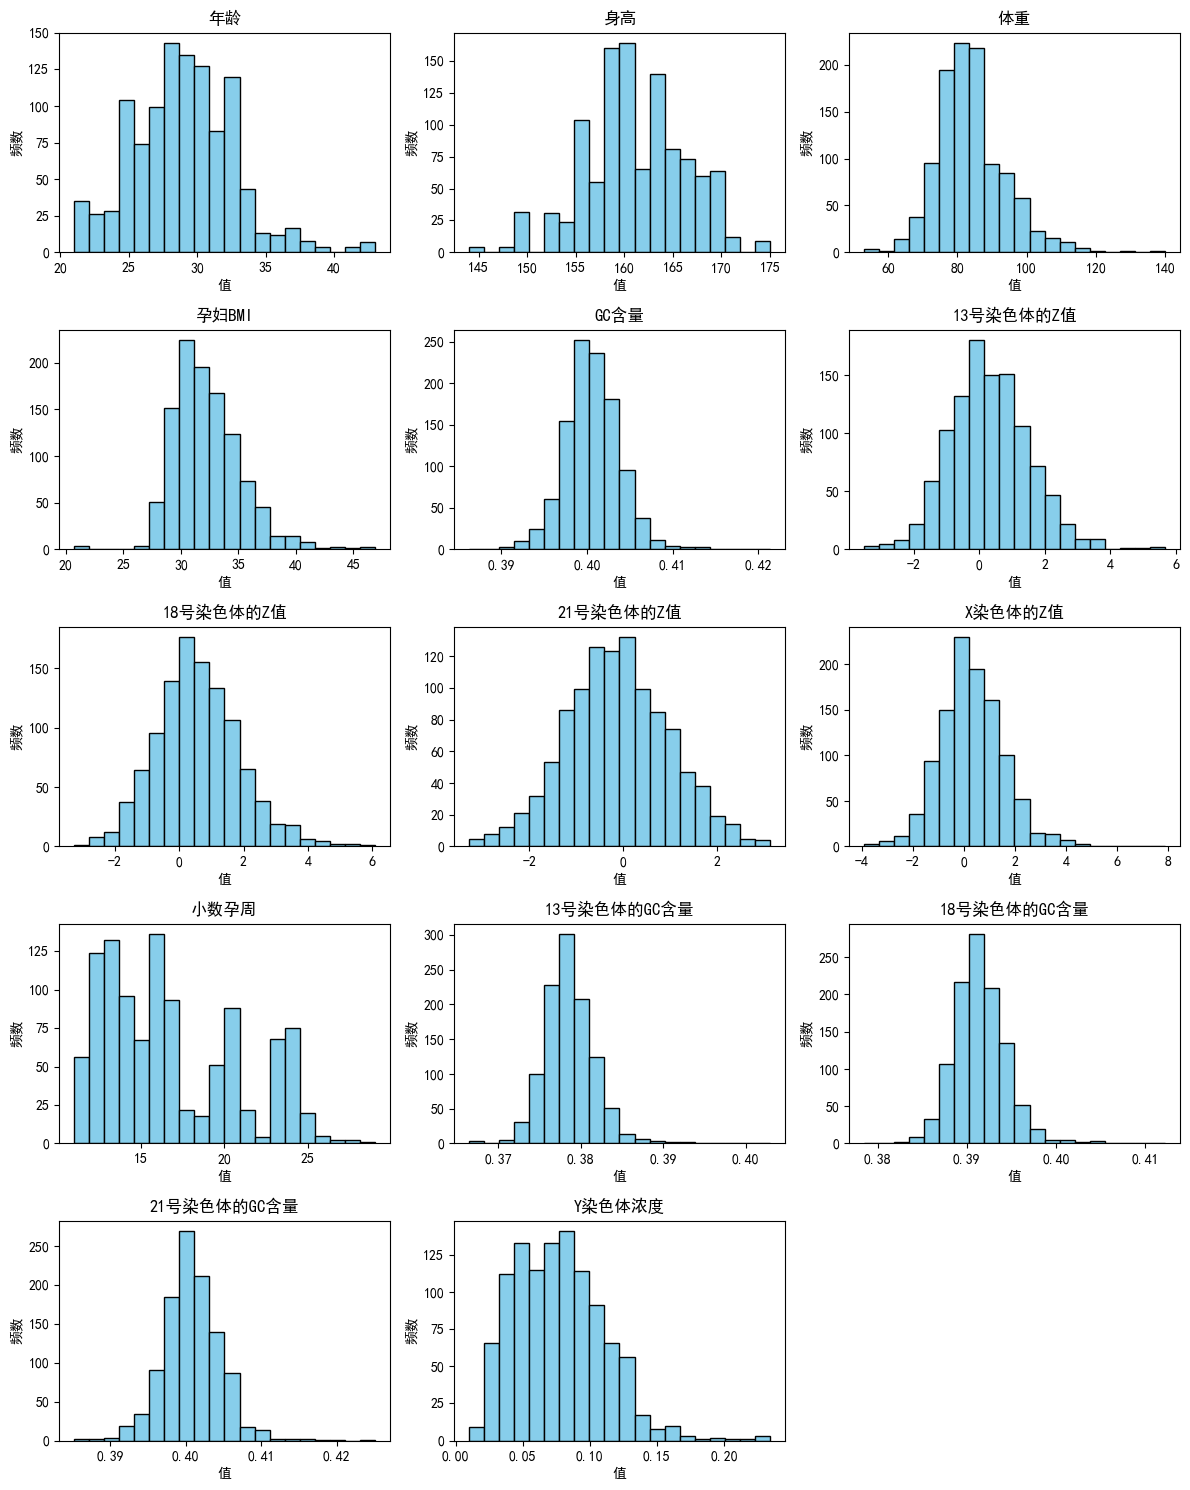

In [490]:
correlation_data = df_processed[needed_columns]
# 计算绘图的行数和列数
num_vars = len(needed_columns)
num_cols = 3  # 每行放3个图
num_rows = (num_vars + num_cols - 1) // num_cols  # 根据变量数量决定行数
# 设置绘图大小
plt.figure(figsize=(num_cols * 4, num_rows * 3))
# 为每个变量绘制直方图
for i, column in enumerate(needed_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.hist(correlation_data[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.xlabel('值')
    plt.ylabel('频数')
# 调整布局
plt.tight_layout()
plt.show()

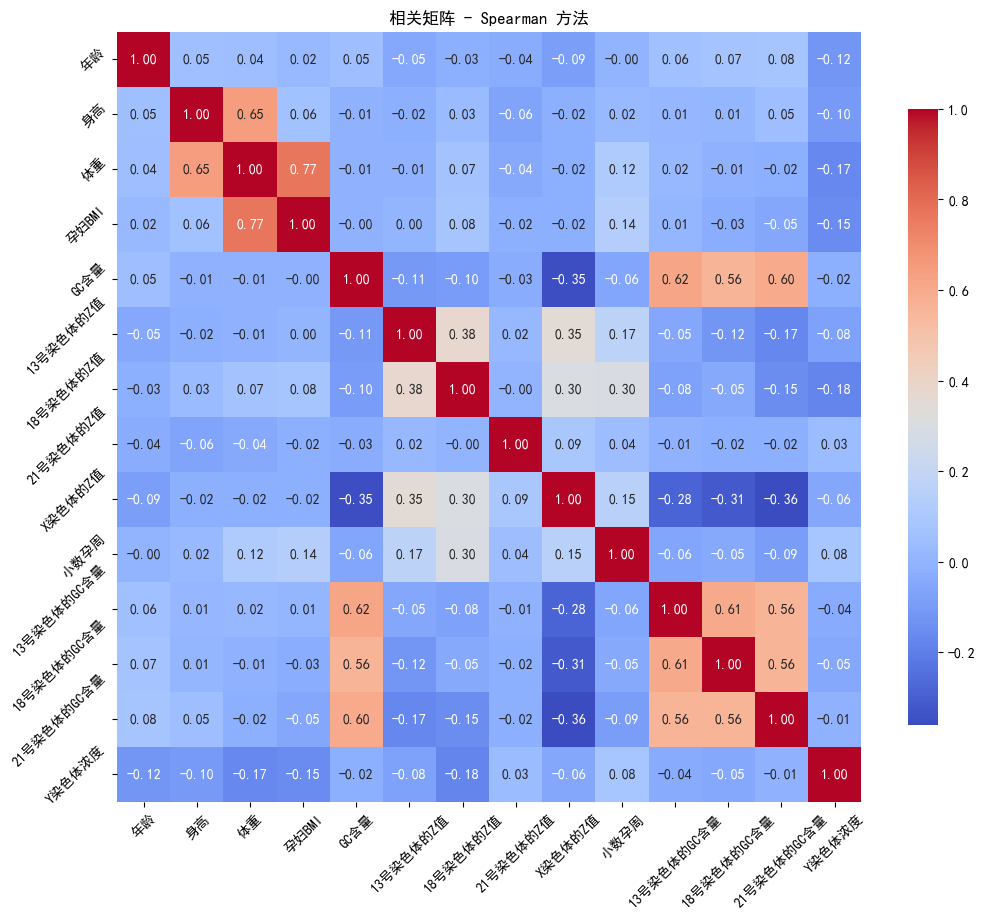

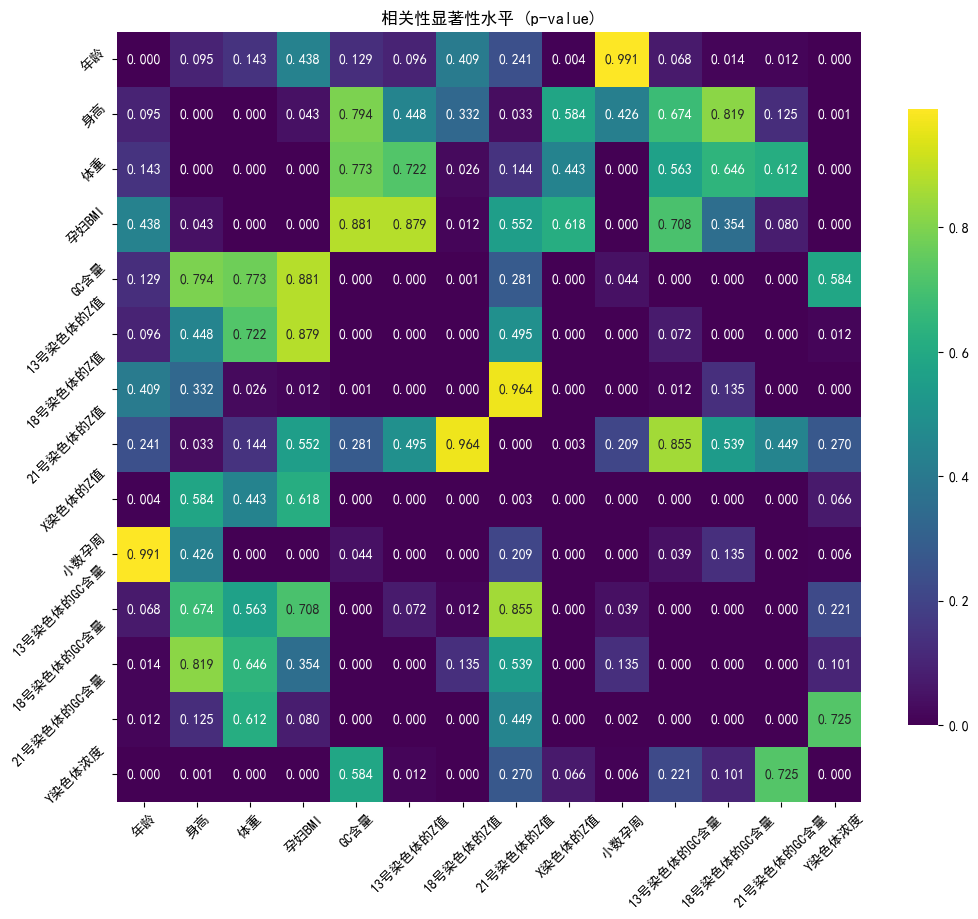

In [491]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# 假设 df_processed 和 needed_columns 已经定义
correlation_data = df_processed[needed_columns]

# 初始化相关矩阵和显著性矩阵
correlation_matrix = np.zeros((len(needed_columns), len(needed_columns)))
p_value_matrix = np.zeros((len(needed_columns), len(needed_columns)))

# 计算Spearman相关系数和p值
for i in range(len(needed_columns)):
    for j in range(len(needed_columns)):
        corr, p_value = spearmanr(correlation_data[needed_columns[i]], correlation_data[needed_columns[j]])
        correlation_matrix[i, j] = corr
        p_value_matrix[i, j] = p_value

correlation_df = pd.DataFrame(correlation_matrix, index=needed_columns, columns=needed_columns)
p_value_df = pd.DataFrame(p_value_matrix, index=needed_columns, columns=needed_columns)

# 可视化相关矩阵和显著性矩阵
plt.figure(figsize=(12, 10))
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体支持中文
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
sns.heatmap(correlation_df, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title('相关矩阵 - Spearman 方法')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(p_value_df, annot=True, fmt=".3f", cmap='viridis', cbar_kws={"shrink": .8})
plt.title('相关性显著性水平 (p-value)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


In [492]:
# 假设年龄列叫 '孕妇年龄'，BMI列叫 '孕妇BMI'
age_col = '小数孕周'
bmi_col = '孕妇BMI'

# 年龄分组
age_bins = [-np.inf, 12, 17, 21, 25, np.inf]
age_labels = [1, 2, 3, 4, 5]
df_processed['孕期组'] = pd.cut(df_processed[age_col], bins=age_bins, labels=age_labels, right=False)

# BMI分组
bmi_bins = [0, 18.5, 25, 30, np.inf]
bmi_labels = [1, 2, 3, 4]
df_processed['孕妇BMI组'] = pd.cut(df_processed[bmi_col], bins=bmi_bins, labels=bmi_labels, right=False)

# 生成16组合
df_processed['group16'] = df_processed['孕期组'].astype(str) + '_' + df_processed['孕妇BMI组'].astype(str)

# 查看结果
print(df_processed.head())


   序号  孕妇代码  年龄     身高    体重                 末次月经 IVF妊娠      检测日期  检测抽血次数  \
0   1  A001  31  160.0  72.0  2023-02-01 00:00:00  自然受孕  20230429       1   
1   2  A001  31  160.0  73.0  2023-02-01 00:00:00  自然受孕  20230531       2   
2   3  A001  31  160.0  73.0  2023-02-01 00:00:00  自然受孕  20230625       3   
3   4  A001  31  160.0  74.0  2023-02-01 00:00:00  自然受孕  20230716       4   
4   5  A002  32  149.0  74.0  2023-11-09 00:00:00  自然受孕  20240219       1   

    检测孕周  ...  怀孕次数  生产次数  胎儿是否健康       小数孕周   年龄组  age_group  bmi_group  \
0  11w+6  ...     1     0       是  11.857143  ≥25岁        NaN          3   
1  15w+6  ...     1     0       是  15.857143  ≥25岁          1          3   
2  20w+1  ...     1     0       是  20.142857  ≥25岁          2          3   
3  22w+6  ...     1     0       是  22.857143  ≥25岁          3          3   
4  13w+6  ...     2     1       否  13.857143  ≥25岁          1          4   

   group16  孕期组  孕妇BMI组  
0      1_3    1       3  
1      2_3    2       3  
2 

In [493]:
filter_columns = ['身高','体重','孕妇BMI', '13号染色体的Z值', '18号染色体的Z值', 'X染色体的Z值', '小数孕周', '18号染色体的GC含量', 'Y染色体浓度']

GAM summary:
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     93.0812
Link Function:                     IdentityLink Log Likelihood:                               -562503.5515
Number of Samples:                         1082 AIC:                                          1125195.2653
                                                AICc:                                         1125213.3931
                                                GCV:                                                 0.001
                                                Scale:                                              0.0009
                                                Pseudo R-Squared:                                   0.2926
Feature Function        

C:\Users\xia\AppData\Local\Temp\ipykernel_41456\4230947067.py:25: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


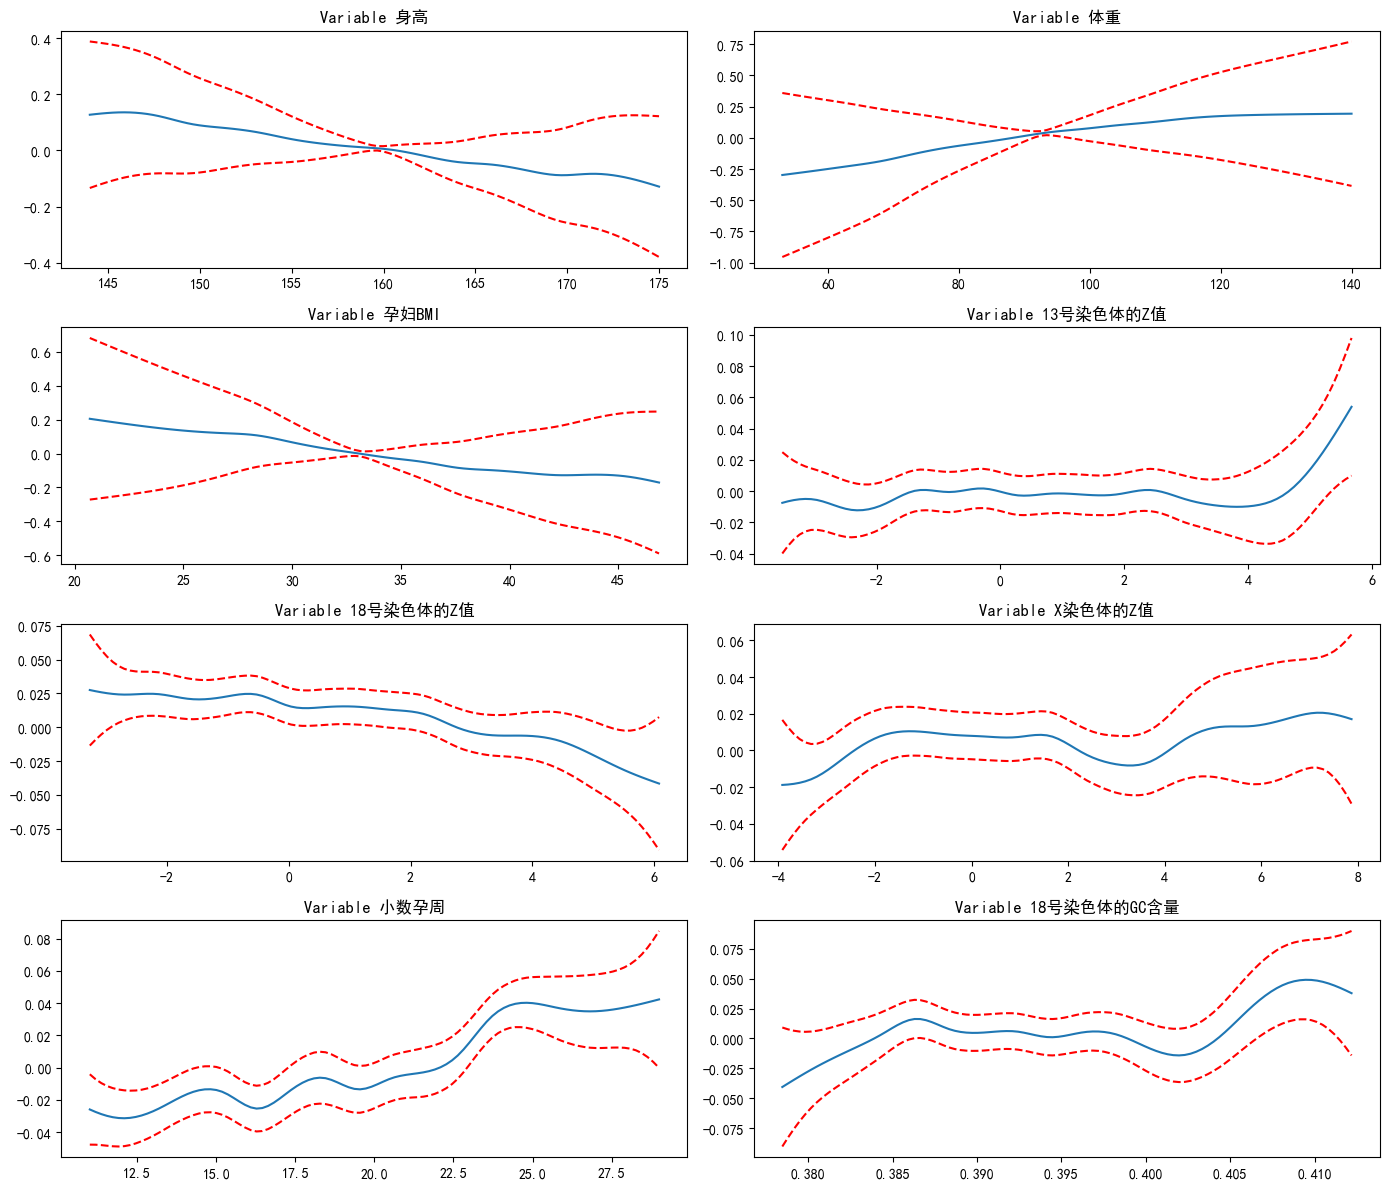

In [494]:
from pygam import LinearGAM, s, f, te
import matplotlib.pyplot as plt

# 自变量、因变量
y = df_processed['Y染色体浓度']
X = df_processed[['身高','体重','孕妇BMI', 
                  '13号染色体的Z值', '18号染色体的Z值', 
                  'X染色体的Z值', '小数孕周', '18号染色体的GC含量']]

# 构建 GAM 模型（对连续变量用平滑函数 s()）
gam = LinearGAM(
    s(0) +  # 身高
    s(1) +  # 体重
    s(2) +  # BMI
    s(3) +  # 13号染色体Z值
    s(4) +  # 18号染色体Z值
    s(5) +  # X染色体Z值
    s(6) +  # 小数孕周
    s(7) +  # 18号染色体GC含量
    te(2,6)
).fit(X, y)

# 打印模型的GCV/拟合度
print("GAM summary:")
print(gam.summary())

# 可视化每个变量的平滑效应
fig, axs = plt.subplots(4, 2, figsize=(14, 12))
axs = axs.ravel()
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=0.95)[1], c='r', ls='--')
    ax.set_title(f'Variable {X.columns[i]}')
plt.tight_layout()
plt.show()


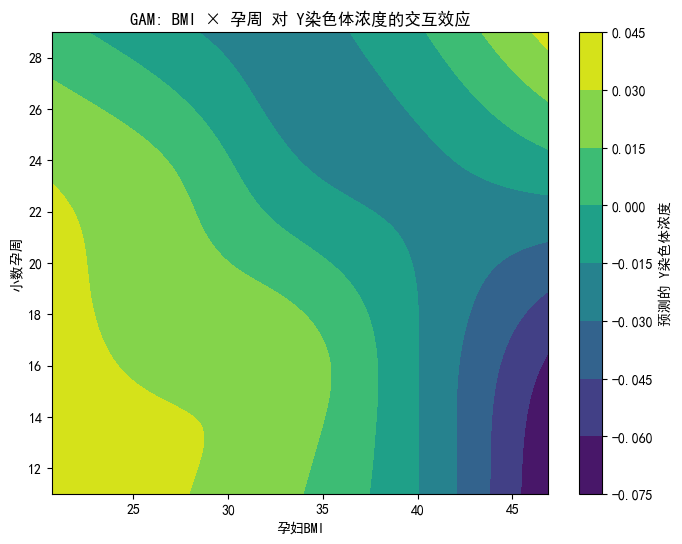

In [495]:
import numpy as np
import matplotlib.pyplot as plt

# term=8 对应 te(2,6)
XX = gam.generate_X_grid(term=8, meshgrid=False)  
Z = gam.partial_dependence(term=8, X=XX)

# 取出 BMI 和孕周的唯一值
bmi_vals = np.unique(XX[:, 2])
week_vals = np.unique(XX[:, 6])

# 把 Z reshape 成 (len(bmi_vals), len(week_vals)) 矩阵
Z = Z.reshape(len(bmi_vals), len(week_vals))

# 画热力图
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
cs = plt.contourf(bmi_vals, week_vals, Z.T, cmap='viridis')
cbar = plt.colorbar(cs)
cbar.set_label("预测的 Y染色体浓度")

plt.xlabel("孕妇BMI")
plt.ylabel("小数孕周")
plt.title("GAM: BMI × 孕周 对 Y染色体浓度的交互效应")
plt.show()



In [496]:
df_processed = df_processed.dropna(subset=['group16'])
grouped = df_processed.groupby('group16')
grouped_lists = {}
for name, group in grouped:
    grouped_lists[name] = group[filter_columns].values.tolist()
# 打印每个分组
for group_name, items in grouped_lists.items():
    print(f"Group {group_name}:")
    for item in items:
        print(item)

Group 1_3:
[160.0, 72.0, 28.125, 0.782096634, -2.321211659, -0.062103083, 11.857142857142858, 0.389803052, 0.02593584]
[158.0, 71.5, 28.64124339, 1.506720483, -0.994698056, -0.353765031, 11.0, 0.395150453, 0.049497736]
[159.0, 72.5, 28.67766307, 1.324436807, 0.581488663, -0.861082986, 11.0, 0.400643766, 0.046937337]
[165.0, 80.0, 29.38475666, 1.439859847, 1.845523433, 3.423393821, 11.0, 0.385783225, 0.049032977]
[163.0, 77.5, 29.16933268, -0.061528304, -1.631720581, 0.589679056, 11.0, 0.392055214, 0.133580848]
[169.0, 85.0, 29.76086271, 0.583941104, 1.353825157, 0.093198399, 11.714285714285714, 0.394659996, 0.054166998]
[170.0, 84.0, 29.06574394, 0.33583004, 1.480438857, 0.261744701, 11.857142857142858, 0.391351104, 0.038769755]
[158.0, 74.0, 29.64268547, -0.149569292, -1.028700975, 0.896578012, 11.857142857142858, 0.391802311, 0.081496899]
[168.0, 83.1, 29.4422328204865, -0.835230624, -1.606990473, -0.771250598, 11.714285714285714, 0.391801662, 0.081978579]
[162.0, 76.72, 29.234951913

In [497]:
regression_results = {}
for group_name, data in grouped_lists.items():
    df_group = pd.DataFrame(data, columns=filter_columns)

    # 删除缺失值
    df_group = df_group.dropna(subset=[dependent_var] + independent_vars)

    # 检查列是否存在
    missing_cols = set([dependent_var] + independent_vars) - set(df_group.columns)
    if missing_cols:
        print(f"Group {group_name} missing columns: {missing_cols}, skipped.")
        continue

    # 样本量检查
    if len(df_group) <= len(independent_vars):
        print(f"Group {group_name} has too few data points, skipped.")
        continue

    # 定义自变量和因变量
    X = df_group[independent_vars]
    y = df_group[dependent_var]

    # 因变量常数检查
    if y.nunique() == 1:
        print(f"Group {group_name} has constant dependent variable, skipped.")
        continue

    # 剔除常数自变量
    X = X.loc[:, X.nunique() > 1]

    # 添加常数项
    X = sm.add_constant(X, has_constant="add")

    # 拟合模型
    try:
        model = sm.OLS(y, X).fit()
        regression_results[group_name] = model
        print(f"Regression done for Group {group_name}, R²={model.rsquared:.3f}")
    except Exception as e:
        print(f"Group {group_name} regression failed: {e}")


Regression done for Group 1_3, R²=0.576
Regression done for Group 1_4, R²=0.176
Group 2_2 has too few data points, skipped.
Regression done for Group 2_3, R²=0.161
Regression done for Group 2_4, R²=0.126
Group 3_2 has too few data points, skipped.
Regression done for Group 3_3, R²=0.271
Regression done for Group 3_4, R²=0.248
Group 4_2 has too few data points, skipped.
Regression done for Group 4_3, R²=0.357
Regression done for Group 4_4, R²=0.162
Group 5_3 has too few data points, skipped.
Regression done for Group 5_4, R²=1.000


c:\Users\xia\anaconda3\envs\MCM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


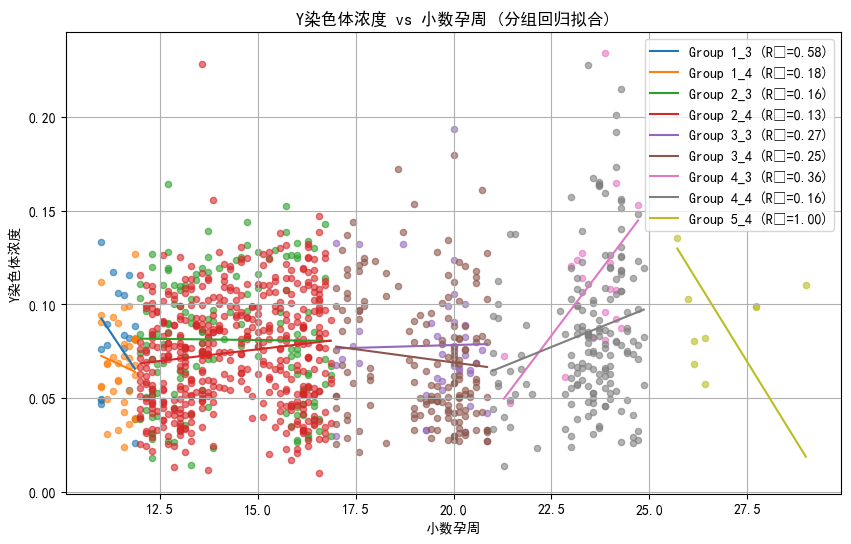

In [498]:
plt.figure(figsize=(10, 6))

for group_name, model in regression_results.items():
    # 取原始数据
    exog = pd.DataFrame(model.model.data.orig_exog, columns=model.model.exog_names)
    endog = pd.Series(model.model.data.orig_endog, name="y")

    if '小数孕周' not in exog.columns:
        print(f"Group {group_name} has no '小数孕周', skipped.")
        continue

    # 绘图区间
    x_min, x_max = exog['小数孕周'].min(), exog['小数孕周'].max()
    x_range = np.linspace(x_min, x_max, 100)

    # 构造预测输入：保持列名和顺序一致
    df_pred = pd.DataFrame({col: exog[col].mean() for col in exog.columns}, index=range(len(x_range)))
    df_pred['小数孕周'] = x_range

    # 确保顺序和训练时一致
    df_pred = df_pred[model.model.exog_names]

    # 预测
    y_pred = model.predict(df_pred)

    # 画拟合曲线
    plt.plot(x_range, y_pred, label=f"Group {group_name} (R²={model.rsquared:.2f})")

    # 原始散点
    plt.scatter(exog['小数孕周'], endog, alpha=0.6, s=20)

plt.xlabel("小数孕周")
plt.ylabel("Y染色体浓度")
plt.title("Y染色体浓度 vs 小数孕周 (分组回归拟合)")
plt.legend()
plt.grid(True)
plt.show()


c:\Users\xia\anaconda3\envs\MCM\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


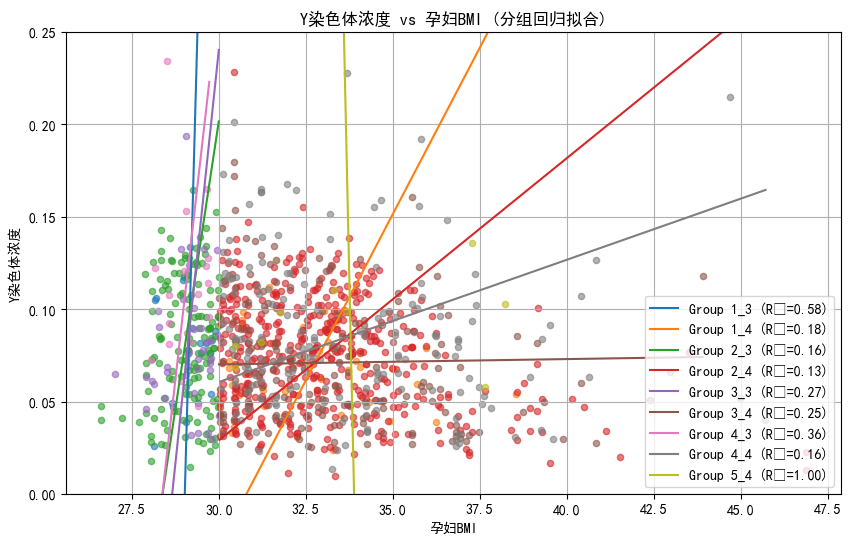

In [499]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))

for group_name, model in regression_results.items():
    # 取原始数据
    exog = pd.DataFrame(model.model.data.orig_exog, columns=model.model.exog_names)
    endog = pd.Series(model.model.data.orig_endog, name="y")

    if '孕妇BMI' not in exog.columns:
        print(f"Group {group_name} has no '孕妇BMI', skipped.")
        continue

    # 绘图区间
    x_min, x_max = exog['孕妇BMI'].min(), exog['孕妇BMI'].max()
    x_range = np.linspace(x_min, x_max, 100)

    # 构造预测输入：保持列名和顺序一致
    df_pred = pd.DataFrame({col: exog[col].mean() for col in exog.columns}, index=range(len(x_range)))
    df_pred['孕妇BMI'] = x_range

    # 确保顺序和训练时一致
    df_pred = df_pred[model.model.exog_names]

    # 预测
    y_pred = model.predict(df_pred)

    # 画拟合曲线
    plt.plot(x_range, y_pred, label=f"Group {group_name} (R²={model.rsquared:.2f})")

    # 原始散点
    plt.scatter(exog['孕妇BMI'], endog, alpha=0.6, s=20)

plt.xlabel("孕妇BMI")
plt.ylabel("Y染色体浓度")
plt.title("Y染色体浓度 vs 孕妇BMI (分组回归拟合)")
plt.legend()
plt.grid(True)
plt.ylim(0, 0.25)  # 设置Y轴范围为0到0.25
plt.show()
